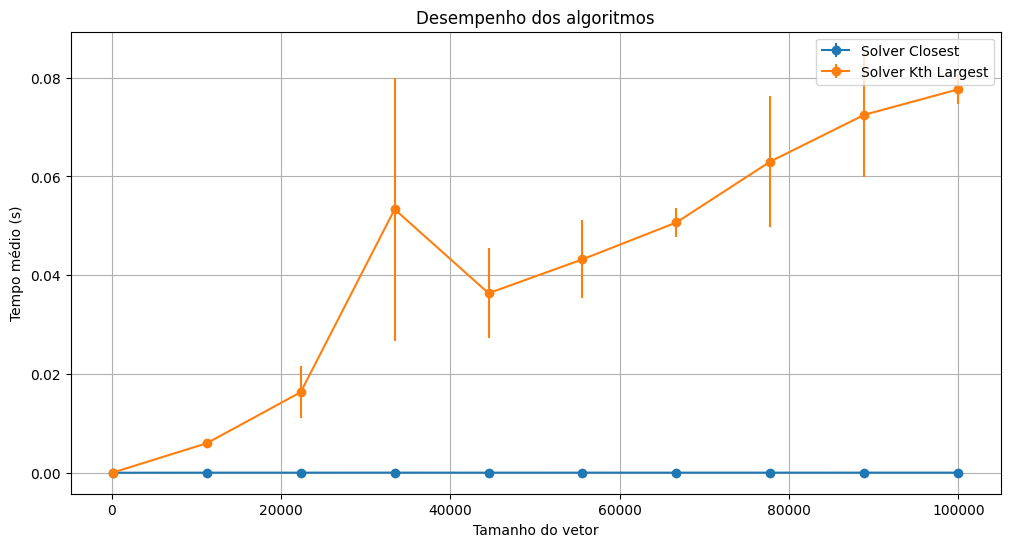

In [1]:

import plotly.graph_objs as go
import numpy as np
import matplotlib.pyplot as plt
from time import time
from scipy.stats import t

# Classe do Nó
class Node:
    def __init__(self, value):
        self.value = value
        self.left_child = None
        self.right_child = None

# Classe da Árvore
class BST:
    def __init__(self):
        self.root = None

    def add(self, value):
        if self.root is None:
            self.root = Node(value)
        else:
            self._add_recursive(self.root, value)

    def _add_recursive(self, current_node, value):
        if value <= current_node.value:
            if current_node.left_child is None:
                current_node.left_child = Node(value)
            else:
                self._add_recursive(current_node.left_child, value)
        else:
            if current_node.right_child is None:
                current_node.right_child = Node(value)
            else:
                self._add_recursive(current_node.right_child, value)

    def contains(self, value):
        return self._contains(self.root, value)

    def _contains(self, current_node, value):
        if current_node is None:
            return False
        if current_node.value == value:
            return True
        if value < current_node.value:
            return self._contains(current_node.left_child, value)
        return self._contains(current_node.right_child, value)

# Funções Solver
def findClosestValue(tree, target):
    return findClosestValueInBstHelper(tree.root, target, tree.root.value)

def findClosestValueInBstHelper(node, target, closest):
    if node is None:
        return closest
    if abs(target - closest) > abs(target - node.value):
        closest = node.value
    if target < node.value:
        return findClosestValueInBstHelper(node.left_child, target, closest)
    elif target > node.value:
        return findClosestValueInBstHelper(node.right_child, target, closest)
    else:
        return closest

def findKthLargestValue(tree, k):
    sortedNodeValues = []
    inOrderTraverse(tree.root, sortedNodeValues)
    return sortedNodeValues[len(sortedNodeValues) - k]

def inOrderTraverse(node, sortedNodeValues):
    if node is None:
        return
    inOrderTraverse(node.left_child, sortedNodeValues)
    sortedNodeValues.append(node.value)
    inOrderTraverse(node.right_child, sortedNodeValues)

# Teste de desempenho e geração de gráficos
np.random.seed(42)
N = 100000
steps = 10
executions_per_size = 5

vector_sizes = np.linspace(100, N, steps, dtype=int)
results_closest = []
results_kth_largest = []
confidence_intervals_closest = []
confidence_intervals_kth_largest = []

for size in vector_sizes:
    times_closest = []
    times_kth_largest = []

    for _ in range(executions_per_size):
        data = np.random.randint(0, 1000, size)
        tree = BST()
        for value in data:
            tree.add(value)

        start = time()
        findClosestValue(tree, target=50)
        times_closest.append(time() - start)

        start = time()
        findKthLargestValue(tree, k=10)
        times_kth_largest.append(time() - start)

    mean_closest = np.mean(times_closest)
    mean_kth_largest = np.mean(times_kth_largest)
    std_closest = np.std(times_closest, ddof=1)
    std_kth_largest = np.std(times_kth_largest, ddof=1)
    ci_closest = t.ppf(0.975, executions_per_size-1) * (std_closest / np.sqrt(executions_per_size))
    ci_kth_largest = t.ppf(0.975, executions_per_size-1) * (std_kth_largest / np.sqrt(executions_per_size))

    results_closest.append(mean_closest)
    results_kth_largest.append(mean_kth_largest)
    confidence_intervals_closest.append(ci_closest)
    confidence_intervals_kth_largest.append(ci_kth_largest)

plt.figure(figsize=(12, 6))
plt.errorbar(vector_sizes, results_closest, yerr=confidence_intervals_closest, label='Solver Closest', fmt='-o')
plt.errorbar(vector_sizes, results_kth_largest, yerr=confidence_intervals_kth_largest, label='Solver Kth Largest', fmt='-o')
plt.xlabel('Tamanho do vetor')
plt.ylabel('Tempo médio (s)')
plt.title('Desempenho dos algoritmos')
plt.legend()
plt.grid(True)
plt.show()
